# Answers to questions
What is the average human life expectancy in the world?<br /> 
How does this differ between low-, medium, and high-income countries? <br />
What characteristics of countries are predictors for differences in life expectancies? <br />
What characteristics are predictors for changes in life expectancy in a country over time?

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_raw = pd.read_csv('data/processed/merged_data.csv')
# rename columns for convenience
data_raw.rename(index=str, columns={'Life expectancy at birth (years)  Both sexes': 'LE_both'}, inplace=True)
data_raw.rename(index=str, columns={'Life expectancy at birth (years)  Male': 'LE_male'}, inplace=True)
data_raw.rename(index=str, columns={'Life expectancy at birth (years)  Female': 'LE_female'}, inplace=True)
data_raw.rename(columns={data_raw.columns[6]: 'GDP'}, inplace=True)
# Current health expenditure (CHE) per capita in US$
data_raw.rename(columns={data_raw.columns[7]: 'Health_expenditure'}, inplace=True)
# Research and development expenditure
data_raw.rename(columns={data_raw.columns[8]: 'RnD'}, inplace=True)
#
# basic cleansing
# South Sudan didn't exist before 2011
data_raw.drop(data_raw.loc[(data_raw['Country']=='South Sudan') & (data_raw['Year']<=2010)].index, inplace=True)
#print(data_raw[data_raw.Country=='South Sudan'])
# we simply drop incomplete lines
#incomplete_data.dropna(subset=['wind_mSec'], inplace=True)
# setting income level correctly if we have GDP values
#TODO: fix issue with indexing when using .loc twice
#print(data_raw[data_raw['Income Level']=='Unknown'])
data_raw.loc[data_raw['GDP'] < 995, 'Income Level'] = 'L'
#data_raw.loc[(data_raw['GDP'] > 995) & (data_raw['GDP'] <= 3895), 'Income Level'] = 'LM'
#data_raw['Income Level'].where((data_raw['GDP'] > 995) & (data_raw['GDP'] < 3896), 'LM', data_raw['Income Level'])

print(data_raw[data_raw['Income Level']=='Unknown'])
# finally copy data_raw to data which represents the cleansed data
data = data_raw.copy()

         Country  Year  LE_both  LE_male  LE_female Income Level          GDP  \
1864  Montenegro  2005     73.8     71.1       76.4      Unknown  3674.617924   
1865  Montenegro  2004     73.7     71.1       76.3      Unknown  3380.165121   
1866  Montenegro  2003     73.6     71.0       76.1      Unknown  2789.159065   
1867  Montenegro  2002     73.5     70.9       76.0      Unknown  2106.635068   
1868  Montenegro  2001     73.3     70.8       75.7      Unknown  1909.598702   
1869  Montenegro  2000     73.1     70.5       75.6      Unknown  1627.072633   
2425      Serbia  2005     73.4     70.8       76.1      Unknown  3528.131008   
2426      Serbia  2004     73.4     70.7       76.1      Unknown  3331.228766   
2427      Serbia  2003     73.2     70.6       75.8      Unknown  2832.490652   
2428      Serbia  2002     73.1     70.4       75.7      Unknown  2149.909404   
2429      Serbia  2001     73.1     70.5       75.8      Unknown  1634.875061   

      Health_expenditure   

### 1. What is the average human life expectancy in the world?

In [23]:
print("The average life expectancy for both sexes is: {0}".format(data['LE_both'].mean()))
print("The average life expectancy for women is : {0}".format(data['LE_female'].mean()))
print("The average life expectancy for men is : {0}".format(data['LE_male'].mean()))

The average life expectancy for both sexes is: 69.20129032258059
The average life expectancy for women is : 71.56838709677417
The average life expectancy for men is : 66.86638709677416


### 2. How does this differ between low-, medium, and high-income countries? 

In [24]:
datagrouped = data.groupby(['Income Level'])
datagrouped['LE_both', 'LE_female', 'LE_male'].mean()

,LE_both,LE_female,LE_male
Income Level,,,
H,78.480728,80.987466,75.962803
L,58.698972,60.228278,57.158226
LM,68.105386,70.588525,65.685597
UM,72.397281,75.451511,69.435045
Unknown,72.215385,74.707692,69.700000


### 3. What characteristics of countries are predictors for differences in life expectancies?

In [50]:
from sklearn.decomposition import PCA
print(data.head)

#print(data.columns)
'''
pca = PCA(n_components=5)
pca.fit(data)
#pca.components_
columns = ['pca_%i' % i for i in range(5)]
df_pca = DataFrame(pca.transform(data), columns=columns, index=data.index)
df_pca.head()
'''

<bound method NDFrame.head of           Country  Year  LE_both  LE_male  LE_female Income Level  \
0     Afghanistan  2016     62.7     61.0       64.5            L   
1     Afghanistan  2015     63.2     61.8       64.7            L   
2     Afghanistan  2014     63.0     61.7       64.4            L   
3     Afghanistan  2013     62.7     61.5       64.1            L   
4     Afghanistan  2012     62.2     60.9       63.6            L   
5     Afghanistan  2011     61.7     60.5       63.1            L   
6     Afghanistan  2010     61.2     59.9       62.5            L   
7     Afghanistan  2009     60.7     59.5       62.1            L   
8     Afghanistan  2008     60.2     59.0       61.6            L   
9     Afghanistan  2007     59.6     58.4       61.0            L   
10    Afghanistan  2006     59.2     58.0       60.5            L   
11    Afghanistan  2005     58.9     57.8       60.1            L   
12    Afghanistan  2004     58.4     57.4       59.6            L   
13  

"\npca = PCA(n_components=5)\npca.fit(data)\n#pca.components_\ncolumns = ['pca_%i' % i for i in range(5)]\ndf_pca = DataFrame(pca.transform(data), columns=columns, index=data.index)\ndf_pca.head()\n"

                        Year   LE_both   LE_male  LE_female       GDP  \
Year                1.000000  0.190830  0.198597   0.180009  0.146334   
LE_both             0.190830  1.000000  0.992158   0.993733  0.589619   
LE_male             0.198597  0.992158  1.000000   0.972655  0.610144   
LE_female           0.180009  0.993733  0.972655   1.000000  0.562067   
GDP                 0.146334  0.589619  0.610144   0.562067  1.000000   
Health_expenditure  0.147424  0.545385  0.560186   0.520355  0.915455   

                    Health_expenditure  
Year                          0.147424  
LE_both                       0.545385  
LE_male                       0.560186  
LE_female                     0.520355  
GDP                           0.915455  
Health_expenditure            1.000000  


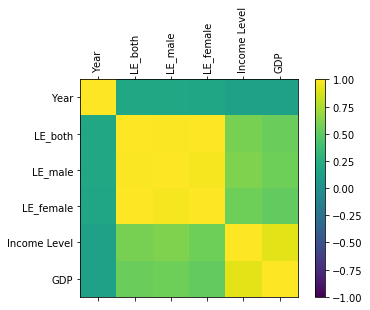

In [101]:
correlations = data.corr()
print(correlations)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

As we can see this is not satisfactoring result, there is no strong correlation between GDP and life expectancy at birth. So let's look at a scatter plot and check if there is at least some linear relation between these variables.

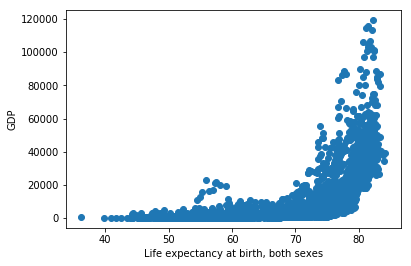

In [7]:
from pandas.plotting import scatter_matrix
#scatter_matrix(data)
#plt.show()
# show simple scatter plot
plt.ylabel('GDP')
plt.xlabel('Life expectancy at birth, both sexes')
plt.scatter(data["LE_both"], data["GDP"])

Next, we'll look at the correlation between 70 and older, maybe we can get better results.

                        Year   LE_both   LE_male  LE_female       GDP  \
Year                1.000000  0.181409  0.173802   0.175834  0.137719   
LE_both             0.181409  1.000000  0.962841   0.958262  0.731017   
LE_male             0.173802  0.962841  1.000000   0.846894  0.727482   
LE_female           0.175834  0.958262  0.846894   1.000000  0.679626   
GDP                 0.137719  0.731017  0.727482   0.679626  1.000000   
Health_expenditure  0.156246  0.747876  0.717125   0.714537  0.898826   

                    Health_expenditure  
Year                          0.156246  
LE_both                       0.747876  
LE_male                       0.717125  
LE_female                     0.714537  
GDP                           0.898826  
Health_expenditure            1.000000  


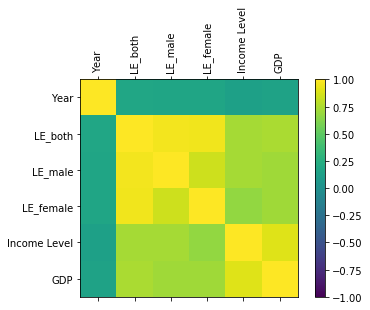

In [103]:
data_elderly = data[data.LE_both > 70]
correlations_elderly = data_elderly.corr()
print(correlations_elderly)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_elderly, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()